# Investigating Income Inequality, Corruption, Health and Literacy

### Author: David Oguara, May 2018

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, we will be investigating income inequality, corruption perception, literacy and health. We will consider which countries are the best and worst in each of these metrics, and seek to uncover relationships between these metrics within countries of the world.


#### Dataset Selection

Gapminder data on literacy, poverty and inequality, and incomes and growth has been selected for use in this analysis. This data comes from multiple original sources, including World Bank, UNESCO, and Transparency International. 

For consistency, we have selected a five-year period, 2007 to 2011, as the active window for investigation. Where gapminder is missing data within this window, we have sourced data directly from the source organization. 

This analysis is not focused on trends over time; rather, it seeks to identify relationships among variables related to socio-economic indicators. Therefore, in most cases, averages over this five-year window are used to investigate these correlations. Five years is seen as short enough to minimise changes in trendline for each variable, and long enough that gaps in data can be filled from alternate years.

CSV files and their sources are listed below:

>**Dataset** / Provider / Filename csv

>**Corruption Perception Index (CPI)** / Transparency International / corruption_2008_2009.csv, corruption_2007_2010_2011.csv

>**Infant Mortality Rate (rate per 1000 births)** / Various sources / infant.csv

>**Literacy rate, adult total (% of people ages 15 and above)** / UNESCO / literacy.csv

>**Inequality index (Gini)** / The World Bank (WEBSITE) / inequality.csv

>**Poverty (% people below USD1.90 a day)** / The World Bank / poverty_2usd.csv

>**GDP/capita (USD, inflation-adjusted)** / The World Bank / gdp.csv

#### Investigation Questions

The following questions will be investigated in this analysis.

**Q1. Which five countries have the highest and lowest income inequality?**

**Q2. Is there a relationship between income inequality and corruption?**

**Q3. Is GDP per capita a good predictor of income inequality?**

**Q4. Does a correlation exist between literacy and health?**

The packages inported below are required to conduct this analysis.

In [1]:
#Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section, we will load the data, inspect it for fitness, and then perform any necessary cleaning and trimming operations to get the data ready for analysis.

### General Properties

**Corruption Perception Index (CPI) - Data Inspection**

From Transparency International website https://www.transparency.org/cpi2011/results: 

>The Corruption Perception Index ranks countries/territories based on how corrupt their public sector is perceived to be. A country/territory’s score indicates the perceived level of public sector corruption on a scale of 0 - 10, where 0 means that a country is perceived as highly corrupt and 10 means that a country is perceived as very clean.

In [2]:
# Import Gapminder cpi data

df_corr_a = pd.read_csv('corruption_2008_2009.csv')
df_corr_a.head()

,Country,2008,2009
0,New Zealand,9.4,9.3
1,Denmark,9.3,9.3
2,Sweden,9.2,9.2
3,Singapore,9.2,9.3
4,Switzerland,9.0,8.7


In [3]:
# Check dimensions

df_corr_a.shape

(180, 3)

In [4]:
df_corr_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
Country    180 non-null object
2008       180 non-null float64
2009       176 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.3+ KB


Gapminder data only contains 2008 and 2009 data. Note that this data is stored in table format, with years as columns. It will need to be converted to long format, with years in a single column. 

Further, our analysis requires 2007 to 2011 data. We have sourced the missing years data from Transparency International website, https://www.transparency.org/research/cpi/overview

In [5]:
# Import missing years data

df_corr_b = pd.read_csv('corruption_2007_2010_2011.csv')
df_corr_b.head()

,country,year,cpi_score
0,Denmark,2007,9.4
1,Finland,2007,9.4
2,New Zealand,2007,9.4
3,Singapore,2007,9.3
4,Sweden,2007,9.3


In [6]:
# Confirm data for desired years is present

df_corr_b.year.value_counts()

2011    183
2007    180
2010    178
Name: year, dtype: int64

In [7]:
# Inspect data types

df_corr_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 3 columns):
country      541 non-null object
year         541 non-null int64
cpi_score    541 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.8+ KB


Data for 2007, 2010, 2011 is stored in ideal long format. Tasks for this dataset will be: 
- transform gapminder subset data into long format
- check and convert data types as needed
- combine gapminder data with manually downloaded missing years data.

Let us proceed to import and inspect the other datasets and identify any data-cleansing tasks.

#### Infant Mortality Rate (rate per 1000 births) - Data Inspection

According to a 2003 paper published in Journal of Epidiemology and Public Health:

>The infant mortality rate (IMR), defined as the number of deaths in children under 1 year of age per 1000 live births in the same year, has in the past been regarded as a highly sensitive (proxy) measure of population health.2 This reflects the apparent association between the causes of infant mortality and other factors that are likely to influence the health status of whole populations such as their economic development, general living conditions, social well being, rates of illness, and the quality of the environment. 

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1732453/

**We have therefore selected infant mortality rate as a measure of whole-country population health for this investigation.**

Data has been sourced from Gapminder.

In [8]:
# Import infant_mortality data
df_infant = pd.read_csv('infant.csv')
df_infant.head()

,Infant mortality rate,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.3,80.4,78.6,76.8,75.1,73.4,71.7,69.9,68.1,66.3
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.4,16.7,16.0,15.4,14.8,14.3,13.8,13.3,12.9,12.5
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.6,26.4,25.3,24.3,23.5,22.8,22.4,22.1,22.0,21.9


#### Literacy rate, adult total (% of people ages 15 and above) - Data Inspection

Adult literacy rate is the percentage of people aged 15 years and above who can read and write. Data is almost entirely collected by UNESCO Institute for Statistis on behalf of UNESCO, and is collated by mostly surveys wherein participants self-declare. The global literacy rate for adults 15 years and older is 86% as at 2015.

Our dataset will investigate average literacy from 2007 to 2011, and identify any relationships to other metrics like health, income inequality and corruption perception. 

In [9]:
# Import literacy data
df_literacy = pd.read_csv('literacy.csv')
df_literacy.head()

,Adult (15+) literacy rate (%). Total,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,18.157681,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.000000
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,95.93864,NaN,NaN,96.845299
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.8735,NaN,NaN,NaN,72.648679,NaN,NaN,NaN,NaN,NaN
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.362420


#### Inequality index (Gini) - Data Inspection

World Bank website, https://data.worldbank.org/indicator/SI.POV.GINI explains the GINI index:
 
> Gini index measures the extent to which the distribution of income (or, in some cases, consumption expenditure) among individuals or households within an economy deviates from a perfectly equal distribution. A Lorenz curve plots the cumulative percentages of total income received against the cumulative number of recipients, starting with the poorest individual or household. The Gini index measures the area between the Lorenz curve and a hypothetical line of absolute equality, expressed as a percentage of the maximum area under the line. Thus a Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality.

Gapminder data only goes to 2010. For convenience, GINI data 2007 to 2011 is downloaded from  the Word Bank website above. This will allow us to match time period of data in other comparison variables.

In [10]:
# Import inequality index data data
df_inequality = pd.read_csv('inequality.csv')
df_inequality.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.0,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Poverty (% people below USD1.90 a day)


According to World Bank website https://data.worldbank.org/indicator/SI.POV.DDAY:

> Poverty headcount ratio at USD1.90 a day is the percentage of the population living on less than USD1.90 a day at 2011 international prices. As a result of revisions in PPP exchange rates, poverty rates for individual countries cannot be compared with poverty rates reported in earlier editions.

Given the above, we will select and use data for 2011 only

In [11]:
# Import poverty index data data
df_poverty = pd.read_csv('poverty_below1_90usd.csv')
df_poverty.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Select only 2011 data
df_poverty = df_poverty.loc[:,['Country Name','2011']]
df_poverty.head()

,Country Name,2011
0,Aruba,NaN
1,Afghanistan,NaN
2,Angola,NaN
3,Albania,NaN
4,Andorra,NaN


#### GDP/capita (USD, inflation-adjusted)

According to Investopedia website:

>Per capita GDP is a measure of the total output of a country that takes the gross domestic product (GDP) and divides it by the number of people in that country. The per capita GDP is especially useful when comparing one country to another, because it shows the relative performance of the countries. A rise in per capita GDP signals growth in the economy and tends to reflect an increase in productivity.

Read more: Per Capita GDP https://www.investopedia.com/terms/p/per-capita-gdp.asp#ixzz5ER0jDGOi 

GDP per capita data is sourced entirely from Gapminder 

In [13]:
# Import gdp per capita data
df_gdp = pd.read_csv('gdp.csv')
df_gdp.head()

,Income per person (fixed 2000 US$),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1313.722725,1381.040832,1454.022854,1525.723589,1594.495067,1681.613910,1804.419415,1857.352947,1915.424459,1965.707230
4,Algeria,1280.384828,1085.414612,855.947986,1128.41578,1170.323896,1215.015783,1127.614288,1200.558225,1291.863983,...,1871.921986,1971.512803,2043.135713,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2231.980246,2255.225482


We have now imported all the data we need for our analysis. During this process we have made a number of observations about the data, and identified initial actions that will need to be carried out to bring the data into a fit state for analysis.

### Data Cleaning

These are our observations on imported data, and the cleaning actions that will need to be performed.

 - Data is held in table format and will need to be converted to long format, so that years appear in a single column
 - Some data will need to be combined, particularly corruption perception data
 - Since we only require 2007 to 2011, data will need to be trimmed to this window
 - Data types will need to be checked and converted as needed
 - The column names for the metrics we wish to investigate will need to be renamed for ease of referencing
 
 Let us now proceed to carry out these cleaning operations.

#### Corruption Perception Index (CPI) - Data Cleaning

In [14]:
# Transpose Gapminder 2008/2009 data into long format, using pd.melt() function

df_corr_a = pd.melt(df_corr_a, id_vars='Country', var_name='year', value_name='cpi_score')

In [15]:
# Rename columns to lowercase to match both datasets
# Recall that df_corr_a holds 2008 & 2009 data, and df_corr_b contains data for missing years (2007, 2010, 2011)

df_corr_a.rename(columns=lambda x: x.lower(), inplace=True);
df_corr_b.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True);

In [16]:
# Check both corruption_perception dataset columns are aligned

df_corr_a.columns == df_corr_b.columns

array([ True,  True,  True])

In [17]:
# Combine corruption_perception datasets into single dataframe

df_corruption = df_corr_a.append(df_corr_b, ignore_index=True)

In [18]:
# Check number of records in combined dataframe

df_corruption.shape

(901, 3)

In [19]:
# Confirm all years data present

df_corruption.year.value_counts()

2011    183
2007    180
2009    180
2008    180
2010    178
Name: year, dtype: int64

In [20]:
# Check datatypes

df_corruption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 3 columns):
country      901 non-null object
year         901 non-null object
cpi_score    897 non-null float64
dtypes: float64(1), object(2)
memory usage: 21.2+ KB


In [21]:
# Inspect 'NaN' records
df_corruption[pd.isnull(df_corruption).any(axis=1)]

,country,year,cpi_score
201,Saint Lucia,2009,NaN
210,Saint Vincent and the Grenadines,2009,NaN
219,Brunei Darussalam,2009,NaN
255,Suriname,2009,NaN


In [22]:
# Inpsect 'year' object

type(df_corruption['year'][0])

str

Observation: 'year' appears to be string object and will need to be converted to integer. Also, NaN values will need to be removed

In [23]:
# convert year to int, remove 'NaN' records
df_corruption.year = pd.to_numeric(df_corruption.year, errors='coerce')
df_corruption.dropna(inplace=True)

In [24]:
# Check data types and dataframe size

df_corruption.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897 entries, 0 to 900
Data columns (total 3 columns):
country      897 non-null object
year         897 non-null int64
cpi_score    897 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 28.0+ KB


In [25]:
df_corruption.head()

,country,year,cpi_score
0,New Zealand,2008,9.4
1,Denmark,2008,9.3
2,Sweden,2008,9.2
3,Singapore,2008,9.2
4,Switzerland,2008,9.0


We have now cleaned the 'corruption perception' dataset and brought it to a fit state for further work. Cleaning actions we successfully performed include:

- Transposing 2008/2009 data into long format
- Renaming columns
- Combining 2008/2009 data with 2007/2010/2011 data
- Converted data types
- Removed NaN records

We will proceed to clean the next dataset, infant mortality rate.

#### Infant Mortality Rate (rate per 1000 births) - Data Cleaning

In [26]:
# Rename columns and Transpose data to long format
df_infant.rename(columns=lambda x: x.replace('Infant mortality rate', 'country'), inplace=True)
df_infant = pd.melt(df_infant, id_vars='country', var_name='year', value_name='infant_mortality_rate')

In [27]:
# Filter data down to desired years, 2007 to 2011
y1 = '2007'
y2 = '2011'
df_infant = df_infant.query('year >= @y1 and year <= @y2')

In [28]:
# convert year to int and infant_mortality_rate to float, remove 'NAs', reset indexes 
df_infant.year = pd.to_numeric(df_infant.year, errors='coerce')
df_infant.infant_mortality_rate = pd.to_numeric(df_infant.infant_mortality_rate, errors='coerce')
df_infant.dropna(inplace=True)
df_infant.reset_index(drop=True, inplace=True)
df_infant.shape

(983, 3)

In [29]:
# Check records per year
df_infant.year.value_counts()

2008    199
2007    199
2011    195
2010    195
2009    195
Name: year, dtype: int64

In [30]:
#Check data types, NaNs
df_infant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 3 columns):
country                  983 non-null object
year                     983 non-null int64
infant_mortality_rate    983 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.1+ KB


In [31]:
df_infant.head()

,country,year,infant_mortality_rate
0,Afghanistan,2007,80.4
1,Albania,2007,16.7
2,Algeria,2007,26.4
3,Andorra,2007,2.8
4,Angola,2007,117.1


Infant mortality rate data is now cleaned.

#### Literacy rate, adult total (% of people ages 15 and above) - Data Cleaning

In [32]:
# Rename columns and Transpose data to long format

df_literacy.rename(columns=lambda x: x.replace('Adult (15+) literacy rate (%). Total', 'country'), inplace=True)
df_literacy = pd.melt(df_literacy, id_vars='country', var_name='year', value_name='literacy_rate')
df_literacy.head()

,country,year,literacy_rate
0,Afghanistan,1975,NaN
1,Albania,1975,NaN
2,Algeria,1975,NaN
3,Andorra,1975,NaN
4,Angola,1975,NaN


In [33]:
# Filter data down to desired years, 2006 to 2010
y1 = '2007'
y2 = '2011'
df_literacy = df_literacy.query('year >= @y1 and year <= @y2')

In [34]:
# convert year to int and literacy_rate to float, remove 'NAs', reset indexes 

df_literacy.year = pd.to_numeric(df_literacy.year, errors='coerce')
df_literacy.literacy_rate = pd.to_numeric(df_literacy.literacy_rate, errors='coerce')
df_literacy.dropna(inplace=True)
df_literacy.reset_index(drop=True, inplace=True)
df_literacy.shape

(206, 3)

In [35]:
# Check records per year
df_literacy.year.value_counts()

2011    84
2010    35
2007    32
2009    28
2008    27
Name: year, dtype: int64

In [36]:
# Check data types, null values
df_literacy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 3 columns):
country          206 non-null object
year             206 non-null int64
literacy_rate    206 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.9+ KB


In [37]:
df_literacy.head()

,country,year,literacy_rate
0,Azerbaijan,2007,99.601906
1,Bolivia,2007,90.743470
2,Brazil,2007,90.009370
3,Burkina Faso,2007,28.729214
4,Cameroon,2007,70.679938


Literacy rate data is now cleaned.

#### Inequality index (Gini) - Data Cleaning

In [38]:
# Rename columns and Transpose data to long format
df_inequality.rename(columns=lambda x: x.replace('Country Name', 'country'), inplace=True)
df_inequality = pd.melt(df_inequality, id_vars='country', var_name='year', value_name='gini_index')
df_inequality.head()

,country,year,gini_index
0,Aruba,1960,NaN
1,Afghanistan,1960,NaN
2,Angola,1960,NaN
3,Albania,1960,NaN
4,Andorra,1960,NaN


In [39]:
# Filter data down to desired years, 2007 to 2011
y1 = '2007'
y2 = '2011'
df_inequality = df_inequality.query('year >= @y1 and year <= @y2')

In [40]:
# Remove 'NaN' values, reset indexes, convert year to int and gini_index to float
df_inequality.dropna(inplace=True)
df_inequality.reset_index(drop=True, inplace=True)
df_inequality.year = pd.to_numeric(df_inequality.year, errors='coerce')
df_inequality.gini_index = pd.to_numeric(df_inequality.gini_index, errors='coerce')
df_inequality.shape

(376, 3)

In [41]:
# Check records per year
df_inequality.year.value_counts()

2010    83
2009    76
2011    74
2007    72
2008    71
Name: year, dtype: int64

In [42]:
# Check data types and null values
df_inequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 3 columns):
country       376 non-null object
year          376 non-null int64
gini_index    376 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.9+ KB


In [43]:
df_inequality.head()

,country,year,gini_index
0,Argentina,2007,46.3
1,Armenia,2007,31.2
2,Austria,2007,30.6
3,Belgium,2007,29.2
4,Bulgaria,2007,36.1


Income inequality dataset is now cleaned and ready for further work.

#### Poverty (% people below USD1.90 a day) - Data Cleaning

In [44]:
# Rename columns and Transpose data to long format
df_poverty.rename(columns=lambda x: x.replace('Country Name', 'country'), inplace=True)
df_poverty = pd.melt(df_poverty, id_vars='country', var_name='year', value_name='poverty_index')
df_poverty.head()

,country,year,poverty_index
0,Aruba,2011,NaN
1,Afghanistan,2011,NaN
2,Angola,2011,NaN
3,Albania,2011,NaN
4,Andorra,2011,NaN


In [45]:
# Remove 'NaN' values, reset indexes, convert year to int and poverty_index to float
df_poverty.dropna(inplace=True)
df_poverty.reset_index(drop=True, inplace=True)
df_poverty.year = pd.to_numeric(df_poverty.year, errors='coerce')
df_poverty.poverty_index = pd.to_numeric(df_poverty.poverty_index, errors='coerce')
df_poverty.shape

(90, 3)

In [46]:
# Confirm only 2011 data present
df_poverty.year.value_counts()

2011    90
Name: year, dtype: int64

In [47]:
# Check data types, null values
df_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
country          90 non-null object
year             90 non-null int64
poverty_index    90 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ KB


In [48]:
df_poverty.head()

,country,year,poverty_index
0,Argentina,2011,0.9
1,Armenia,2011,2.2
2,Austria,2011,0.5
3,Belgium,2011,0.2
4,Benin,2011,53.1


We have now completed cleaning of the poverty_index dataset.

#### GDP/capita (USD, inflation-adjusted) - Data Cleaning**

We will now perform cleaning on the GDP dataset

In [49]:
# Rename columns and Transpose data to long format
df_gdp.rename(columns=lambda x: x.replace('Income per person (fixed 2000 US$)', 'country'), inplace=True)
df_gdp = pd.melt(df_gdp, id_vars='country', var_name='year', value_name='gdp_per_capita')
df_gdp.head()

,country,year,gdp_per_capita
0,Abkhazia,1960,NaN
1,Afghanistan,1960,NaN
2,Akrotiri and Dhekelia,1960,NaN
3,Albania,1960,NaN
4,Algeria,1960,1280.384828


In [50]:
# Filter data down to desired years, 2007 to 2011
y1 = '2007'
y2 = '2011'
df_gdp = df_gdp.query('year >= @y1 and year <= @y2')

In [51]:
# Remove 'NaN' values, reset indexes, convert year to int and gdp_per_capita to float
df_gdp.dropna(inplace=True)
df_gdp.reset_index(drop=True, inplace=True)
df_gdp.year = pd.to_numeric(df_gdp.year, errors='coerce')
df_gdp.gdp_per_capita = pd.to_numeric(df_gdp.gdp_per_capita, errors='coerce')
df_gdp.shape

(930, 3)

In [52]:
# Check records per year
df_gdp.year.value_counts()

2007    193
2008    191
2009    189
2010    182
2011    175
Name: year, dtype: int64

In [53]:
# Check data types and nulls

df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 3 columns):
country           930 non-null object
year              930 non-null int64
gdp_per_capita    930 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 21.9+ KB


In [54]:
df_gdp.head(1)

,country,year,gdp_per_capita
0,Albania,2007,1681.61391


GDP per capita data is now cleaned.

At this stage, we have cleaned the single-variable data sets. We shall now comine them into a single dataframe, to allow for comparisons across variable

#### Combined Data

In the cell below, we will combine all individual datasets into a single dataframe.

In [55]:
# Combine individual datasets into a single dataframe

df = pd.merge(df_corruption, df_infant, on=['country', 'year'], how='outer')
df = pd.merge(df, df_literacy, on=['country', 'year'], how='outer')
df = pd.merge(df, df_inequality, on=['country', 'year'], how='outer')
df = pd.merge(df, df_poverty, on=['country', 'year'], how='outer')
df = pd.merge(df, df_gdp, on=['country', 'year'], how='outer')

Let us inspect the combined data.

In [56]:
df.head()

,country,year,cpi_score,infant_mortality_rate,literacy_rate,gini_index,poverty_index,gdp_per_capita
0,New Zealand,2008,9.4,5.3,NaN,NaN,NaN,15011.18385
1,Denmark,2008,9.3,3.6,NaN,25.2,NaN,32320.10054
2,Sweden,2008,9.2,2.6,NaN,26.8,NaN,32798.73425
3,Singapore,2008,9.2,2.2,NaN,NaN,NaN,30131.61718
4,Switzerland,2008,9.0,4.0,NaN,33.8,NaN,39324.73112


In [57]:
df.shape

(1104, 8)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 0 to 1103
Data columns (total 8 columns):
country                  1104 non-null object
year                     1104 non-null int64
cpi_score                897 non-null float64
infant_mortality_rate    983 non-null float64
literacy_rate            206 non-null float64
gini_index               376 non-null float64
poverty_index            90 non-null float64
gdp_per_capita           930 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 77.6+ KB


In [59]:
df.describe()

,year,cpi_score,infant_mortality_rate,literacy_rate,gini_index,poverty_index,gdp_per_capita
count,1104.000000,897.000000,983.000000,206.000000,376.000000,90.000000,930.000000
mean,2009.009058,4.014158,28.860905,84.283146,36.582979,9.026667,8418.930436
std,1.437078,2.088395,26.159773,17.152699,8.551911,15.310287,13276.734101
min,2007.000000,1.000000,1.760000,25.307745,23.700000,0.000000,97.910183
25%,2008.000000,2.500000,7.750000,76.014593,30.175000,0.200000,672.367236
50%,2009.000000,3.300000,18.300000,91.845252,33.950000,1.200000,2503.908898
75%,2010.000000,5.100000,45.400000,96.178175,42.325000,8.425000,9783.327358
max,2011.000000,9.500000,120.500000,99.998262,63.400000,54.200000,108111.212800


In [60]:
# Check records per year
df.year.value_counts()

2011    233
2007    228
2010    217
2008    217
2009    209
Name: year, dtype: int64

In [61]:
# Check for duplicated values
df.duplicated().value_counts()

False    1104
dtype: int64

In [62]:
df.country.value_counts()

Pakistan                          5
Luxembourg                        5
Sudan                             5
Bosnia and Herzegovina            5
Angola                            5
North Korea                       5
Belize                            5
Malawi                            5
Russia                            5
Cameroon                          5
Canada                            5
Dominican Republic                5
Estonia                           5
Nepal                             5
Switzerland                       5
Slovak Republic                   5
Tanzania                          5
Mexico                            5
Finland                           5
United States                     5
Fiji                              5
Vietnam                           5
France                            5
Chad                              5
Afghanistan                       5
Belarus                           5
Turkey                            5
St. Vincent and the Grenadin

We have made a number of observations on this combined dataframe.

Our variables where correctly combined into a single dataframe, there appear to be no duplicates, and the data types are correct.

However, we observe that some country names are not consistently spelt, for example, 'Democratic Republic of Congo' and 'Democratic Republic of the Congo' likely refer to the same country. Similarly, 'Russia' and 'Russian Federation' both appear in the data.

Also, some records appear to be for non-state entities, for example, 'High income' and 'Latin America & Carribean' and 'Fragile and conflict affected situations'.

We also spot a row for 'Kuweit' and speculate there may be a separate row for 'Kuwait'.

In [63]:
#Check for occurence of 'Kuwait' or 'Kuweit'

a1 = 'kuweit'
a2 = 'kuwait'

df.query('country.str.lower() == @a1 or country.str.lower() == @a2')

,country,year,cpi_score,infant_mortality_rate,literacy_rate,gini_index,poverty_index,gdp_per_capita
65,Kuwait,2008,4.1,9.7,93.906206,NaN,NaN,25308.08492
242,Kuwait,2009,4.5,9.5,NaN,NaN,NaN,23116.34061
415,Kuweit,2007,4.3,NaN,NaN,NaN,NaN,NaN
589,Kuwait,2010,4.5,9.2,NaN,NaN,NaN,23114.58667
768,Kuwait,2011,4.6,8.9,NaN,NaN,NaN,24286.11580
908,Kuwait,2007,NaN,9.8,93.664185,NaN,NaN,25100.02810


In [64]:
# Check for occurence of 'Russia' or 'Russian Federation'

a3 = 'russia'
a4 = 'russian federation'

df.query('country.str.lower() == @a3 or country.str.lower() == @a4')

,country,year,cpi_score,infant_mortality_rate,literacy_rate,gini_index,poverty_index,gdp_per_capita
146,Russia,2008,2.2,11.6,NaN,NaN,NaN,3043.665599
322,Russia,2009,2.1,10.9,NaN,NaN,NaN,2806.414830
500,Russia,2007,2.3,12.4,NaN,NaN,NaN,2888.847355
697,Russia,2010,2.1,10.3,99.684267,NaN,NaN,2928.005033
861,Russia,2011,2.4,9.8,NaN,NaN,NaN,3054.727742
1058,Russian Federation,2007,NaN,NaN,NaN,42.3,NaN,NaN
1061,Russian Federation,2008,NaN,NaN,NaN,41.6,NaN,NaN
1063,Russian Federation,2009,NaN,NaN,NaN,39.8,NaN,NaN
1068,Russian Federation,2010,NaN,NaN,NaN,39.5,NaN,NaN
1069,Russian Federation,2011,NaN,NaN,NaN,39.7,0.0,NaN


As suspected, 'Kuwait' and 'Kuweit' both occur in the data, as do records against both 'Russia' and 'Russian Federation'

We therefore judge that a manual process of cleaning 'country' needs to be performed outside python, and the cleaned data then re-integrated into our analysis data.

To accomplish this, we shall export a unique list of countries, manually create a mapping table containing valid countries with names spelt correctly, and then import this back into our dataframe.

This edit will also afford us the opportunity to augment country data with Region categorization, to pose and answer additional questions. Regional classifications have been obtained from the website below.

https://meta.wikimedia.org/wiki/List_of_countries_by_regional_classification

Important to stress fixing errors in country names cannot be performed programatically.

In [65]:
# This snippet exports the original country list to a csv file
pd.DataFrame.to_csv(pd.DataFrame(df.country.value_counts()),'country_list.csv')
#pd.DataFrame(df.country.value_counts())


After performing offline cleaning of the country list and adding of 'Region' information, we are now ready to import and integrate this list into our dataset.

Filename holding our cleaned country list is: 'country_list_clean.csv'

In [66]:
country_list = pd.read_csv('country_list_clean.csv')
country_list.head()

,country,country_fixed,region
0,Uzbekistan,Uzbekistan,CIS
1,Tuvalu,Tuvalu,Asia & Pacific
2,Estonia,Estonia,Europe
3,Papua New Guinea,Papua New Guinea,Asia & Pacific
4,Slovakia,Slovakia,Europe


In [67]:
# Check that same number of records exist in both country lists

print('Dimensions - Original Country List: {}\nDimensions - Cleaned Country List: {}'.
      format(pd.DataFrame(df.country.value_counts()).shape, country_list.shape))

Dimensions - Original Country List: (261, 1)
Dimensions - Cleaned Country List: (261, 3)


In [68]:
# Import columns into analysis dataframe
df = pd.merge(df, country_list, how='left', left_on='country', right_on='country')
df.head()

,country,year,cpi_score,infant_mortality_rate,literacy_rate,gini_index,poverty_index,gdp_per_capita,country_fixed,region
0,New Zealand,2008,9.4,5.3,NaN,NaN,NaN,15011.18385,New Zealand,Asia & Pacific
1,Denmark,2008,9.3,3.6,NaN,25.2,NaN,32320.10054,Denmark,Europe
2,Sweden,2008,9.2,2.6,NaN,26.8,NaN,32798.73425,Sweden,Europe
3,Singapore,2008,9.2,2.2,NaN,NaN,NaN,30131.61718,Singapore,Asia & Pacific
4,Switzerland,2008,9.0,4.0,NaN,33.8,NaN,39324.73112,Switzerland,Europe


In [69]:
# Take a copy of the dataframe, and perfom cleaning in this copy
df_clean = df.copy()

One of the actions we performed in building a clean country list was to identify non-country records in our original data. These 'countries' have been marked as 'DELETE' in the country_fixed column of our cleaned data, so as to easily identify them for removal.

We will now display and then remove these records.

In [70]:
# List records for non-country entities, which have been identified with "DELETE" 
#   in 'country_fixed' column

df_clean.query('country_fixed == "DELETE"')

,country,year,cpi_score,infant_mortality_rate,literacy_rate,gini_index,poverty_index,gdp_per_capita,country_fixed,region
1070,East Asia & Pacific,2011,NaN,NaN,NaN,NaN,8.6,NaN,DELETE,NaN
1072,Fragile and conflict affected situations,2011,NaN,NaN,NaN,NaN,36.9,NaN,DELETE,NaN
1073,High income,2011,NaN,NaN,NaN,NaN,0.6,NaN,DELETE,NaN
1074,IDA total,2011,NaN,NaN,NaN,NaN,34.1,NaN,DELETE,NaN
1075,Latin America & Caribbean,2011,NaN,NaN,NaN,NaN,5.6,NaN,DELETE,NaN
1076,Low income,2011,NaN,NaN,NaN,NaN,50.5,NaN,DELETE,NaN
1077,Lower middle income,2011,NaN,NaN,NaN,NaN,19.6,NaN,DELETE,NaN
1078,Low & middle income,2011,NaN,NaN,NaN,NaN,16.4,NaN,DELETE,NaN
1079,Middle East & North Africa,2011,NaN,NaN,NaN,NaN,2.7,NaN,DELETE,NaN
1080,South Asia,2011,NaN,NaN,NaN,NaN,20.1,NaN,DELETE,NaN


In [71]:
# Remove records

df_clean = df_clean.query('country_fixed != "DELETE"')

In [72]:
# Check records no longer exist

df_clean.query('country_fixed =="DELETE"')

,country,year,cpi_score,infant_mortality_rate,literacy_rate,gini_index,poverty_index,gdp_per_capita,country_fixed,region


Deletion of non-country records was successful.

Next, let's look at instances where same countries have different spellings. Examples we spotted earlier are 'Kuwait vs Kuweit', and 'Russia vs Russian Federation'. Our manual check uncovered many more. In cells below however, let us display name anomalies for Kuwait and Russian Federation.

In [73]:
# Using earlier example of 'Kuwait' or 'Kuweit'

a1 = 'kuweit'
a2 = 'kuwait'

df.query('country.str.lower() == @a1 or country.str.lower() == @a2')

,country,year,cpi_score,infant_mortality_rate,literacy_rate,gini_index,poverty_index,gdp_per_capita,country_fixed,region
65,Kuwait,2008,4.1,9.7,93.906206,NaN,NaN,25308.08492,Kuwait,Arab States
242,Kuwait,2009,4.5,9.5,NaN,NaN,NaN,23116.34061,Kuwait,Arab States
415,Kuweit,2007,4.3,NaN,NaN,NaN,NaN,NaN,Kuwait,Arab States
589,Kuwait,2010,4.5,9.2,NaN,NaN,NaN,23114.58667,Kuwait,Arab States
768,Kuwait,2011,4.6,8.9,NaN,NaN,NaN,24286.11580,Kuwait,Arab States
908,Kuwait,2007,NaN,9.8,93.664185,NaN,NaN,25100.02810,Kuwait,Arab States


In [74]:
# Using the earlier seen 'Russia' vs 'Russian Federation' example

a3 = 'russia'
a4 = 'russian federation'
df_clean.query('country.str.lower() == @a3 or country.str.lower() == @a4')

,country,year,cpi_score,infant_mortality_rate,literacy_rate,gini_index,poverty_index,gdp_per_capita,country_fixed,region
146,Russia,2008,2.2,11.6,NaN,NaN,NaN,3043.665599,Russian Federation,Europe
322,Russia,2009,2.1,10.9,NaN,NaN,NaN,2806.414830,Russian Federation,Europe
500,Russia,2007,2.3,12.4,NaN,NaN,NaN,2888.847355,Russian Federation,Europe
697,Russia,2010,2.1,10.3,99.684267,NaN,NaN,2928.005033,Russian Federation,Europe
861,Russia,2011,2.4,9.8,NaN,NaN,NaN,3054.727742,Russian Federation,Europe
1058,Russian Federation,2007,NaN,NaN,NaN,42.3,NaN,NaN,Russian Federation,Europe
1061,Russian Federation,2008,NaN,NaN,NaN,41.6,NaN,NaN,Russian Federation,Europe
1063,Russian Federation,2009,NaN,NaN,NaN,39.8,NaN,NaN,Russian Federation,Europe
1068,Russian Federation,2010,NaN,NaN,NaN,39.5,NaN,NaN,Russian Federation,Europe
1069,Russian Federation,2011,NaN,NaN,NaN,39.7,0.0,NaN,Russian Federation,Europe


Column 'country_fixed' contains the correct country names. 

However, our comparison metrics are split across variants of country spellings in 'country' column. How many rows are duplicated in this way?

In [75]:
# Number of rows with duplicates on 'country_fixed' and 'year' columns

df_clean.duplicated(['country_fixed','year']).value_counts()

False    1023
True       68
dtype: int64

We have 68 duplicates.

Let us illustrate a single instance of this problem, using Russia data for 2008.

In [76]:
# Show records for Russia, 2008

y = int(2008)
df_clean.query('country_fixed.str.lower() == @a4 and year == @y')

,country,year,cpi_score,infant_mortality_rate,literacy_rate,gini_index,poverty_index,gdp_per_capita,country_fixed,region
146,Russia,2008,2.2,11.6,NaN,NaN,NaN,3043.665599,Russian Federation,Europe
1061,Russian Federation,2008,NaN,NaN,NaN,41.6,NaN,NaN,Russian Federation,Europe


As observed earlier, records for Russia in year 2008 are split across two rows, 146 and 1061. All metrics for Russia in year 2008 need to appear in a single row. This principle applies to all similarly duplicated records.  

We will use groupby() to consolidate values, using 'country_fixed', 'year' and 'region' as keys, and reset index to restore keys to columns.

In [77]:
# Groupby to consolidate values
df_clean = pd.DataFrame(df_clean.groupby(['country_fixed','year','region']).sum())

#reset index, to restore country, year and region to columns
df_clean.reset_index(level=df_clean.index.names, inplace=True)
df_clean.head(6)

,country_fixed,year,region,cpi_score,infant_mortality_rate,literacy_rate,gini_index,poverty_index,gdp_per_capita
0,Afghanistan,2007,Asia & Pacific,1.8,80.4,0.0,0.0,0.0,0.00000
1,Afghanistan,2008,Asia & Pacific,1.3,78.6,0.0,0.0,0.0,0.00000
2,Afghanistan,2009,Asia & Pacific,1.4,76.8,0.0,0.0,0.0,0.00000
3,Afghanistan,2010,Asia & Pacific,1.4,75.1,0.0,0.0,0.0,0.00000
4,Afghanistan,2011,Asia & Pacific,1.5,73.4,39.0,0.0,0.0,0.00000
5,Albania,2007,Europe,2.9,16.7,0.0,0.0,0.0,1681.61391


In [78]:
# Check to confirm "Russian Federation" record is now correctly displayed

y = int(2008)
df_clean.query('country_fixed.str.lower() == @a4 and year == @y')

,country_fixed,year,region,cpi_score,infant_mortality_rate,literacy_rate,gini_index,poverty_index,gdp_per_capita
745,Russian Federation,2008,Europe,2.2,11.6,0.0,41.6,0.0,3043.665599


In [79]:
# Check if any duplicates on 'country_fixed' and 'year' columns

df_clean.duplicated(['country_fixed','year']).value_counts()

False    1021
dtype: int64

We sucessfully used groupby() to ensure all metrics for each year, country and region combination appear on a single row, and then removed the resulting duplicated. We now have correct unique records per country and year. We have confirmed this by checking the record for Russia in 2008.

Let us now rename the country_fixed column, and proceed with further checks.

In [80]:
# Rename 'country_fixed' to 'country'

df_clean.rename(columns=lambda x: x.replace('country_fixed', 'country'), inplace=True)
df_clean.head(1)

,country,year,region,cpi_score,infant_mortality_rate,literacy_rate,gini_index,poverty_index,gdp_per_capita
0,Afghanistan,2007,Asia & Pacific,1.8,80.4,0.0,0.0,0.0,0.0


In [81]:
df_clean.describe()

,year,cpi_score,infant_mortality_rate,literacy_rate,gini_index,poverty_index,gdp_per_capita
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,2008.980411,3.522331,27.786748,17.005218,13.472282,0.541528,7668.565432
std,1.416848,2.373268,26.243390,34.703443,18.399647,4.362516,12895.942581
min,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,2.200000,7.000000,0.000000,0.000000,0.000000,498.570158
50%,2009.000000,3.000000,17.300000,0.000000,0.000000,0.000000,2134.037162
75%,2010.000000,4.700000,43.900000,0.000000,31.500000,0.000000,8151.712950
max,2011.000000,11.000000,120.500000,99.998262,63.400000,54.200000,108111.212800


Observe that counts on all columns are 1021. Values that were null in original datasets are now held as zeros, resulting in incorrect counts. Incorrect counts on columns will cause wrong values for mean, min, max and other aggregations.

We will need to change the zeros back to null.

In [82]:
# Replace all zeros with NaN, so our aggregations (count, mean, sum, min) are accurate

df_clean = df_clean.replace(0.0, np.nan)
df_clean.describe()

,year,cpi_score,infant_mortality_rate,literacy_rate,gini_index,poverty_index,gdp_per_capita
count,1021.000000,894.000000,983.000000,206.000000,376.000000,57.000000,930.000000
mean,2008.980411,4.022707,28.860905,84.283146,36.582979,9.700000,8418.930436
std,1.416848,2.101977,26.159773,17.152699,8.551911,16.006952,13276.734101
min,2007.000000,1.000000,1.760000,25.307745,23.700000,0.100000,97.910183
25%,2008.000000,2.500000,7.750000,76.014593,30.175000,0.500000,672.367236
50%,2009.000000,3.300000,18.300000,91.845252,33.950000,1.800000,2503.908898
75%,2010.000000,5.100000,45.400000,96.178175,42.325000,7.900000,9783.327358
max,2011.000000,11.000000,120.500000,99.998262,63.400000,54.200000,108111.212800


Obeserving the output in the last two cells, we note that the 'count' aggregation now correctly shows the number of non-zero values in each column. Also, min, mean and other aggregations are now correctly calculated.

We will now create a version of our dataset that contains average of each measure by country. This will be used for most of the following analysis. Why have taken this decision?

Within the five year window of our dataset, countries will have missing data across years. Taking an average of yearly observations by country allows us to run comparisons among countries with reduced concern over availability of data in a given year.

In [83]:
# Create dataframe of average observations by country. 
df_avg = df_clean.drop('year', axis=1)
df_avg = pd.DataFrame(df_avg.groupby(['country','region']).mean())

# reset indexes and restore 'country' and 'region' columns
df_avg.reset_index(level=df_avg.index.names, inplace=True)

df_avg.head(10)

,country,region,cpi_score,infant_mortality_rate,literacy_rate,gini_index,poverty_index,gdp_per_capita
0,Afghanistan,Asia & Pacific,1.48,76.86,39.000000,NaN,NaN,NaN
1,Albania,Europe,3.16,15.44,96.391969,30.00,NaN,1844.903592
2,Algeria,Arab States,2.90,24.46,NaN,27.60,0.5,2201.836568
3,Andorra,Europe,NaN,2.60,NaN,NaN,NaN,21719.572490
4,Angola,Africa,1.98,112.08,70.362420,42.70,NaN,611.714745
5,Antigua and Barbuda,South/Latin America,NaN,8.22,98.950000,NaN,NaN,11817.136463
6,Argentina,South/Latin America,2.92,13.38,97.858770,44.00,0.9,10321.740247
7,Armenia,CIS,2.70,17.02,99.568170,29.56,2.2,1391.495500
8,Aruba,South/Latin America,NaN,NaN,96.822640,NaN,NaN,NaN
9,Australia,Asia & Pacific,8.70,4.20,NaN,35.05,NaN,25092.326418


'Averages' dataframe was successfully created.

Let us inspect this dataframe, to identify any anomalies and plan any corrective actions. 

In [84]:
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 8 columns):
country                  211 non-null object
region                   211 non-null object
cpi_score                185 non-null float64
infant_mortality_rate    199 non-null float64
literacy_rate            140 non-null float64
gini_index               134 non-null float64
poverty_index            57 non-null float64
gdp_per_capita           193 non-null float64
dtypes: float64(6), object(2)
memory usage: 13.3+ KB


In [85]:
df_avg.mean()

cpi_score                   4.025874
infant_mortality_rate      28.644548
literacy_rate              82.733571
gini_index                 38.365933
poverty_index               9.700000
gdp_per_capita           9170.833436
dtype: float64

In [86]:
df_avg.describe()

,cpi_score,infant_mortality_rate,literacy_rate,gini_index,poverty_index,gdp_per_capita
count,185.000000,199.000000,140.000000,134.000000,57.000000,193.000000
mean,4.025874,28.644548,82.733571,38.365933,9.700000,9170.833436
std,2.090305,26.047186,18.664967,8.469815,16.006952,14625.856835
min,1.000000,1.930000,25.307745,24.540000,0.100000,103.104815
25%,2.460000,7.677500,71.369112,31.875000,0.500000,731.926135
50%,3.240000,17.680000,90.599093,36.340000,1.800000,2581.767415
75%,5.140000,44.650000,97.713798,43.550000,7.900000,10558.767324
max,9.380000,112.080000,99.998262,63.200000,54.200000,103885.246787


We notice there are null values in the metrics columns, with the worst being 'poverty_index' with only 57 valid records in our dataset of 211 records.

**The paucity of values against 'poverty' suggests our ability to run comparisons across countries in this column will be limited. We will therefore remove the 'poverty_index' column from our df_avg dataset.**

In [87]:
# Remove 'poverty_index' column

df_avg.drop('poverty_index', axis=1, inplace=True)
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
country                  211 non-null object
region                   211 non-null object
cpi_score                185 non-null float64
infant_mortality_rate    199 non-null float64
literacy_rate            140 non-null float64
gini_index               134 non-null float64
gdp_per_capita           193 non-null float64
dtypes: float64(5), object(2)
memory usage: 11.6+ KB


Null values in other columns will need to be filled in. Our approach will be to use the 'Region' averages to fill in missing values. 

In [88]:
# Calculate and inspect Region mean values 

df_avg.groupby(['region']).mean()

,cpi_score,infant_mortality_rate,literacy_rate,gini_index,gdp_per_capita
region,,,,,
Africa,2.945891,61.859545,64.777314,45.027143,1256.879586
Arab States,3.478000,30.746667,81.398935,33.212500,7493.379077
Asia & Pacific,3.890270,27.043810,81.383965,37.144133,6875.002351
CIS,2.380000,27.272000,99.603976,30.420000,1361.668615
Europe,5.789512,5.607500,98.149657,31.779065,20446.367688
North America,7.990000,5.660000,NaN,37.225000,42977.916206
South/Latin America,3.983229,18.504306,92.565855,48.778125,5744.894997


We observe that with only one exception, we can obtain region mean for all metrics. These region mean values will be used to fill in the missing values.

Literacy rate appears to be missing for the entire North American region. We will fill this in by using the overall or global literacy rate mean. 

First, however, we will now fill in the missing values using region averages where available.

In [89]:
# Temporary dataframe with missing values filled in with region averages 

df_avg_fill = df_avg.groupby('region').transform(lambda x: x.fillna(x.mean()))
df_avg_fill.head()

,cpi_score,infant_mortality_rate,literacy_rate,gini_index,gdp_per_capita
0,1.480000,76.86,39.000000,37.144133,6875.002351
1,3.160000,15.44,96.391969,30.000000,1844.903592
2,2.900000,24.46,81.398935,27.600000,2201.836568
3,5.789512,2.60,98.149657,31.779065,21719.572490
4,1.980000,112.08,70.362420,42.700000,611.714745


We will now replace columns in our 'averages' dataset with columns from our 'filled-in-values' dataset

In [90]:
# Copy filled-in values into our working 'averages' dataset

df_avg.cpi_score = df_avg_fill.cpi_score
df_avg.infant_mortality_rate = df_avg_fill.infant_mortality_rate
df_avg.literacy_rate = df_avg_fill.literacy_rate
df_avg.gini_index = df_avg_fill.gini_index
df_avg.gdp_per_capita = df_avg_fill.gdp_per_capita

Using a temporary dataframe, we obtained corrected metrics columns and then used these fixed columns to replace columns in our dataset. With the exception of literacy_rate for North America, all null values should now be filled.

Let us now inspect our working dataset.

In [91]:
df_avg.head()

,country,region,cpi_score,infant_mortality_rate,literacy_rate,gini_index,gdp_per_capita
0,Afghanistan,Asia & Pacific,1.480000,76.86,39.000000,37.144133,6875.002351
1,Albania,Europe,3.160000,15.44,96.391969,30.000000,1844.903592
2,Algeria,Arab States,2.900000,24.46,81.398935,27.600000,2201.836568
3,Andorra,Europe,5.789512,2.60,98.149657,31.779065,21719.572490
4,Angola,Africa,1.980000,112.08,70.362420,42.700000,611.714745


In [92]:
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
country                  211 non-null object
region                   211 non-null object
cpi_score                211 non-null float64
infant_mortality_rate    211 non-null float64
literacy_rate            208 non-null float64
gini_index               211 non-null float64
gdp_per_capita           211 non-null float64
dtypes: float64(5), object(2)
memory usage: 11.6+ KB


As observed earlier, 'literacy_rate' has some null values. Let us see details of those records.

In [93]:
# List records with Null

df_avg[pd.isnull(df_avg).any(axis=1)]

,country,region,cpi_score,infant_mortality_rate,literacy_rate,gini_index,gdp_per_capita
20,Bermuda,North America,7.99,5.66,NaN,37.225,65455.868678
33,Canada,North America,8.78,4.94,NaN,33.700,25781.976322
201,United States,North America,7.20,6.38,NaN,40.750,37695.903618


As decided earlier, we will obtain the global mean of literacy_rate and assign this to North American countries.

In [94]:
# We are interested in the mean of Literacy rate

df_avg.describe()

,cpi_score,infant_mortality_rate,literacy_rate,gini_index,gdp_per_capita
count,211.000000,211.000000,208.000000,211.000000,211.000000
mean,4.088697,27.883904,84.767862,39.064161,8890.097876
std,2.002674,25.568050,16.496973,7.960935,14024.659745
min,1.000000,1.930000,25.307745,24.540000,103.104815
25%,2.610000,7.550000,81.383965,33.035000,878.625684
50%,3.480000,17.780000,92.182549,37.144133,3036.536292
75%,5.170000,43.290000,98.149657,45.027143,9054.292336
max,9.380000,112.080000,99.998262,63.200000,103885.246787


All columns now appear to have values, with exception of literacy rate. As observed earlier, literacy rate is missing values for 3 countries in North America.

To remedy this, we will use the global literacy rate average, 84.7, for these North American countries.

In [95]:
# Fill in missing literacy rate values using global average

df_avg.literacy_rate = df_avg.literacy_rate.fillna(df_avg.literacy_rate.mean())

Let us confirm that the average literacy rate value has replaced the null North American values.

In [96]:
df_avg.query('region == "North America"')

,country,region,cpi_score,infant_mortality_rate,literacy_rate,gini_index,gdp_per_capita
20,Bermuda,North America,7.99,5.66,84.767862,37.225,65455.868678
33,Canada,North America,8.78,4.94,84.767862,33.700,25781.976322
201,United States,North America,7.20,6.38,84.767862,40.750,37695.903618


In [97]:
df_avg[pd.isnull(df_avg).any(axis=1)]

,country,region,cpi_score,infant_mortality_rate,literacy_rate,gini_index,gdp_per_capita


Missing literacy rate for North America was correctly updated.

One final check of our data, to confirm all cleaning actions have been successfully carried out.

In [98]:
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
country                  211 non-null object
region                   211 non-null object
cpi_score                211 non-null float64
infant_mortality_rate    211 non-null float64
literacy_rate            211 non-null float64
gini_index               211 non-null float64
gdp_per_capita           211 non-null float64
dtypes: float64(5), object(2)
memory usage: 11.6+ KB


In [99]:
df_avg.describe()

,cpi_score,infant_mortality_rate,literacy_rate,gini_index,gdp_per_capita
count,211.000000,211.000000,211.000000,211.000000,211.000000
mean,4.088697,27.883904,84.767862,39.064161,8890.097876
std,2.002674,25.568050,16.378714,7.960935,14024.659745
min,1.000000,1.930000,25.307745,24.540000,103.104815
25%,2.610000,7.550000,81.383965,33.035000,878.625684
50%,3.480000,17.780000,91.559827,37.144133,3036.536292
75%,5.170000,43.290000,98.149657,45.027143,9054.292336
max,9.380000,112.080000,99.998262,63.200000,103885.246787


In [100]:
df_avg.head()

,country,region,cpi_score,infant_mortality_rate,literacy_rate,gini_index,gdp_per_capita
0,Afghanistan,Asia & Pacific,1.480000,76.86,39.000000,37.144133,6875.002351
1,Albania,Europe,3.160000,15.44,96.391969,30.000000,1844.903592
2,Algeria,Arab States,2.900000,24.46,81.398935,27.600000,2201.836568
3,Andorra,Europe,5.789512,2.60,98.149657,31.779065,21719.572490
4,Angola,Africa,1.980000,112.08,70.362420,42.700000,611.714745


Cleaning now appears complete, missing values appear to have been filled in.

What have we done so far? We have :
   
   - Consolidated our data from multiple files / sources into a single data set
   - Removed data for non-country entities
   - Resolved naming discrepancies, and combined observations where needed
   - Augmented our data by adding 'region' classification
   - Created a version of our dataset that holds the five-year average of observations in each metric
   - Identified missing values
   - Removed 'Poverty' metric from our dataset, and re-framed our questions, due to large number of missing values
   - Used Region averages to fill in missing values, and a global average where regional average was not available
   - Checked and confirmed all cleaning actions successsful and complete. 

As a result of these steps, our data is now ready for exploratory analysis.

Before we dive into exploratory analysis however, let us take a quick overview of distributions within our metrics, followed by a brief description of the range of values in each.

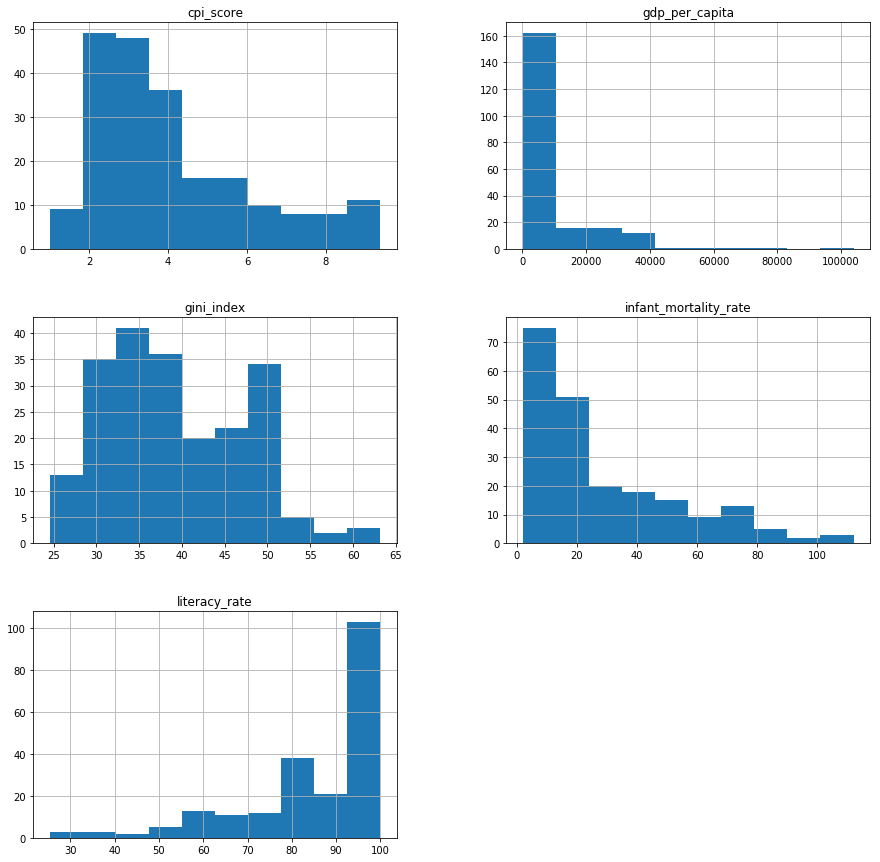

In [101]:
df_avg.hist(figsize=(15,15));

**A brief reminder of the columns, what they measure and the value range.**


**CPI Score:** Ranks countries/territories based on how corrupt their public sector is perceived to be. 0 means that a country is perceived as highly corrupt and 10 means that a country is perceived as very clean.


**GDP per Capita:** Per capita GDP is a measure of the total output of a country that takes the gross domestic product (GDP) and divides it by the number of people in that country. Higher values for per capita GDP signals high productivity withiin a country. Values are in USD.


**GINI Index:** Measures the extent to which the distribution of income among individuals or households within an economy deviates from a perfectly equal distribution. A Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality.

**Infant Mortality Rate (IMR):** IMR has been defined as the number of deaths in children under 1 year of age per 1000 live births in the same year.

**Adult Literacy Rate:** Adult literacy rate is the percentage of people aged 15 years and above who can read and write.


<a id='eda'></a>
## Exploratory Data Analysis

Let us now explore our data, using our research questions as guide.

### Q1. Which five countries have the worst and best measures of income inequality?

A Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality.


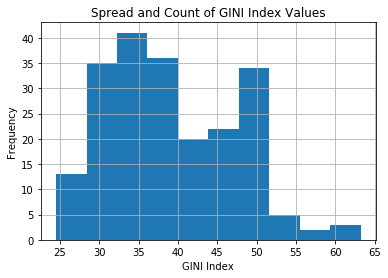

In [102]:
# Quick view of distribution of GINI data

df_avg.gini_index.hist()
plt.title('Spread and Count of GINI Index Values')
plt.ylabel('Frequency')
plt.xlabel('GINI Index');

In [103]:
df_avg.gini_index.mean(), df_avg.gini_index.median()

(39.064160699836485, 37.144133333333336)

Data appears to skew to the right, implying that if we split the data around the middle point, we will find there are more countries with high income inequality (low values in the index) than there are with low inequality. Let us identify the five highest and lowest. 

The next cell will identify the 5 highest and 5 lowest, and combine the results into a single dataframe.

In [104]:
# Lowest income inequality
l = df_avg.gini_index.drop_duplicates().nsmallest(5)
df_lowest_gini = df_avg.query('gini_index == @l')
df_lowest_gini_t = df_lowest_gini.drop(['cpi_score', 'infant_mortality_rate', 'literacy_rate', 'gdp_per_capita'], axis=1)
df_lowest_gini_t['gini_type'] = 'Lowest inequality'

# Highest income inequality
h = df_avg.gini_index.drop_duplicates().nlargest(5)
df_highest_gini = df_avg.query('gini_index == @h')
df_highest_gini_t = df_highest_gini.drop(['cpi_score', 'infant_mortality_rate', 'literacy_rate', 'gdp_per_capita'], axis=1)
df_highest_gini_t['gini_type'] = 'Highest inequality'

# Combine lowest and Highest GINI
df_gini_lh_t = df_lowest_gini_t.append(df_highest_gini_t)
df_gini_lh_t

,country,region,gini_index,gini_type
51,Czech Republic,Europe,26.30,Lowest inequality
141,Norway,Europe,26.26,Lowest inequality
166,Slovakia,Europe,26.34,Lowest inequality
167,Slovenia,Europe,24.54,Lowest inequality
198,Ukraine,CIS,25.66,Lowest inequality
24,Botswana,Africa,60.50,Highest inequality
36,Central African Republic,Africa,56.20,Highest inequality
130,Namibia,Africa,61.00,Highest inequality
170,South Africa,Africa,63.20,Highest inequality
209,Zambia,Africa,55.60,Highest inequality


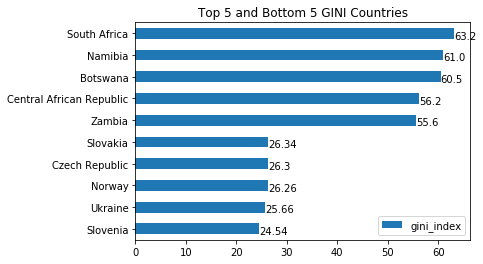

In [105]:
# Plot five highest and five lowest on a horizontal bar chart

df_gini_lh_t.sort_values(by=['gini_index'], inplace=True)
ax = df_gini_lh_t.plot(kind='barh')
ax.set_yticklabels(df_gini_lh_t.country)

ax.set_title('Top 5 and Bottom 5 GINI Countries')

# set individual bar labels
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y(), str(round((i.get_width()), 2)));
    
# Credit for annotations: http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html

All five worst inequality scores are in Africa, while countries with best (lowest) inequality scores are in Europe. Let's use the 'region' calssification to see if this trend extends beyong the five highest and lowest.

In [106]:
# GINI index by region 

df_avg.groupby('region')['gini_index'].mean()

region
Africa                 45.027143
Arab States            33.212500
Asia & Pacific         37.144133
CIS                    30.420000
Europe                 31.779065
North America          37.225000
South/Latin America    48.778125
Name: gini_index, dtype: float64

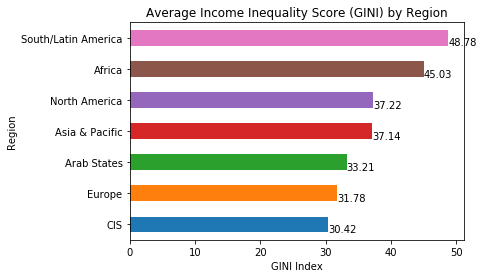

In [107]:
# Groupby 'region' in the main dataset, and plot a histogram on the value count

df_avg_mean = df_avg.groupby('region')['gini_index'].mean()
df_avg_mean.sort_values(inplace=True)
ax = df_avg_mean.plot(kind='barh')

ax.set_title('Average Income Inequality Score (GINI) by Region')
ax.set_xlabel('GINI Index')
ax.set_ylabel('Region')

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y(), str(round((i.get_width()), 2)));

Surprisingly, although Africa has the five worst countries with income inequality, the region with worst average income equality appears to be South America. Let us try to understand why by comparing inequality among three regions: Africa, Europe and South America

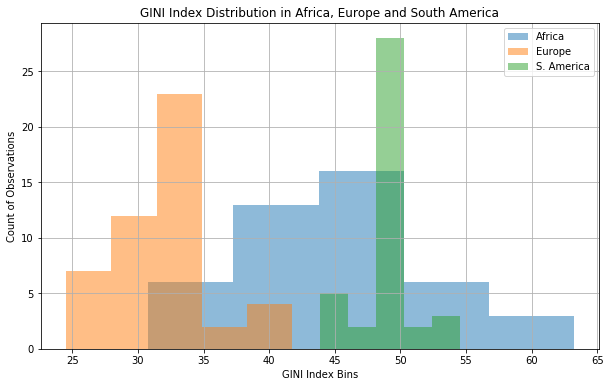

In [108]:
# Create masks
africa = df_avg.region == 'Africa'
europe = df_avg.region == 'Europe'
s_america = df_avg.region == 'South/Latin America'

# Filter and plot
df_avg.gini_index[africa].hist(alpha=0.5, bins=5, label='Africa', figsize=(10,6))
df_avg.gini_index[europe].hist(alpha=0.5, bins=5, label='Europe', figsize=(10,6))
df_avg.gini_index[s_america].hist(alpha=0.5, bins=5, label='S. America', figsize=(10,6))
#plt.figure(figsize=(15,15))
plt.title('GINI Index Distribution in Africa, Europe and South America')
plt.ylabel('Count of Observations')
plt.xlabel('GINI Index Bins')

plt.legend();

The above histogram helps us understand our earlier finding. The GINI observations in South America are tightly clustered between 44 and 55. With Africa on the other hand, observations are spread across a broad value range. A few African countries appear to have low levels of income inequality (low GINI indexes), and these countries push Africa to a superior average score relative to South America. 

Lastly, let us identify these unusual African countries with low income inequality scores. 

In [109]:
# Top five African countries with best income inequality measures

al = df_avg[africa].gini_index.drop_duplicates().nsmallest(5)
df_africa_lowest_gini = df_avg[africa].query('gini_index == @al')
df_africa_lowest_gini_t = df_africa_lowest_gini.drop(['cpi_score', 'infant_mortality_rate', 'literacy_rate', 'gdp_per_capita'], axis=1)
df_africa_lowest_gini_t['gini_type'] = 'Lowest inequality'
df_africa_lowest_gini_t.sort_values(by='gini_index')

,country,region,gini_index,gini_type
159,Sao Tome and Principe,Africa,30.8,Lowest inequality
115,Mali,Africa,33.0,Lowest inequality
62,Ethiopia,Africa,33.2,Lowest inequality
164,Sierra Leone,Africa,34.0,Lowest inequality
137,Niger,Africa,34.4,Lowest inequality


So our observation in relation to this question is that **the top five countries with lowest income inequality are in Europe. On the other hand, the top 5 countries with highest income inquality are in Africa.** However, a few Afrian countries seem to have admirably high levels of fair income distribution, so that on average, South America, not Africa, appears to have the worst income inequality.

### Q2. Is there a relationship between income inequality and corruption?

**Important Note:**

**With GINI, 0 is perfect income distribution and 100 is totally imperfect income distribution**

**With CPI, 0 is very corrupt and 10 is very clean**

In [110]:
# Create dataframe with only these two columns

df_q2 = df_avg.drop(['infant_mortality_rate', 'literacy_rate', 'gdp_per_capita'], axis=1)

df_q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 4 columns):
country       211 non-null object
region        211 non-null object
cpi_score     211 non-null float64
gini_index    211 non-null float64
dtypes: float64(2), object(2)
memory usage: 6.7+ KB


In earlier exploration, we have looked closely at the income inequality (GINI) data. Let us now examine data in the 'corruption perception' column.

As a reminder, CPI Score ranks countries based on how corrupt their public sector is perceived to be. **0 means that a country is perceived as highly corrupt and 10 means that a country is perceived as very clean.**

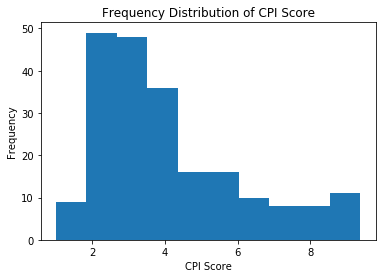

In [111]:
#Plot  frequency distribution of cpi score

df_q2.cpi_score.plot(kind='hist')
plt.title('Frequency Distribution of CPI Score')
plt.xlabel('CPI Score');

In [112]:
df_q2.cpi_score.describe()

count    211.000000
mean       4.088697
std        2.002674
min        1.000000
25%        2.610000
50%        3.480000
75%        5.170000
max        9.380000
Name: cpi_score, dtype: float64

We note that the CPI distribution is skewed to the right, implying that a larger number of countries score lower than the average corruption perception.

Let us see how this differs by region.

In [113]:
# List all regions

df_q2.region.drop_duplicates()

0          Asia & Pacific
1                  Europe
2             Arab States
4                  Africa
5     South/Latin America
7                     CIS
20          North America
Name: region, dtype: object

In [114]:
# Create masks

asia = df_q2.region == 'Asia & Pacific'
europe = df_q2.region == 'Europe'
arab = df_q2.region == 'Arab States'
africa = df_q2.region == 'Africa'
s_america = df_q2.region == 'South/Latin America'
cis = df_q2.region == 'CIS'
n_america = df_q2.region == 'North America'

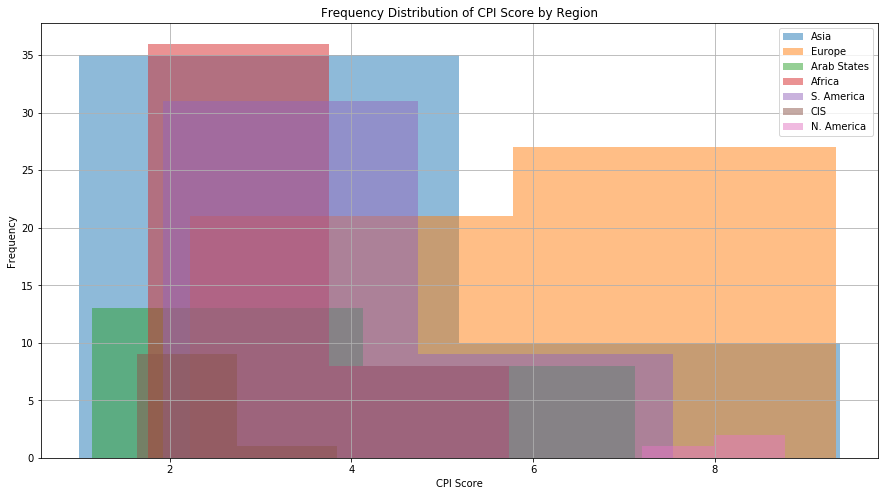

In [115]:
# Filter dataframe by masks and plot histogram

df_q2.cpi_score[asia].hist(alpha=0.5, bins=2, label='Asia', figsize=(15,8))
df_q2.cpi_score[europe].hist(alpha=0.5, bins=2, label='Europe', figsize=(15,8))
df_q2.cpi_score[arab].hist(alpha=0.5, bins=2, label='Arab States', figsize=(15,8))
df_q2.cpi_score[africa].hist(alpha=0.5, bins=2, label='Africa', figsize=(15,8))
df_q2.cpi_score[s_america].hist(alpha=0.5, bins=2, label='S. America', figsize=(10,8))
df_q2.cpi_score[cis].hist(alpha=0.5, bins=2, label='CIS', figsize=(15,8))
df_q2.cpi_score[n_america].hist(alpha=0.5, bins=2, label='N. America', figsize=(15,8))

# Set title and label axes
plt.title('Frequency Distribution of CPI Score by Region')
plt.xlabel('CPI Score')
plt.ylabel('Frequency')

plt.legend();

Some interesting observations here regarding CPI Score.

Most countries in Africa, Asia, North America have poor scores on corruption perception, whereas Europe appears to have a small marority of countries with higher than average scores.

Africa in particular appears to have most countries scoring below the global average.

Given that this is a measure of perception as opposed to presence of corruption (which is near impossible to objectively measure), it can be pointed out that a population dissatisfied with its standard of living is likely to percieve it's public servants as corrupt. Obviously this perception will be further heightened when public sector inefficiency is combined with ostentatious living of public officials, and where the justice system does not act consistently and promptly against accused corrupt officers.



Let us now examine the data to see if a relationship exists between income inequality and corruption perception.

Recall that CPI goes from zero to ten, where zero means a country is percieved as highly corrupt. GINI goes from zero to 100, where 100 denotes perfect income inequality, that is, one person earns all income. So the measures are not travelling in the same direction. Careful interpretation and careful use of terms will therefore be required.

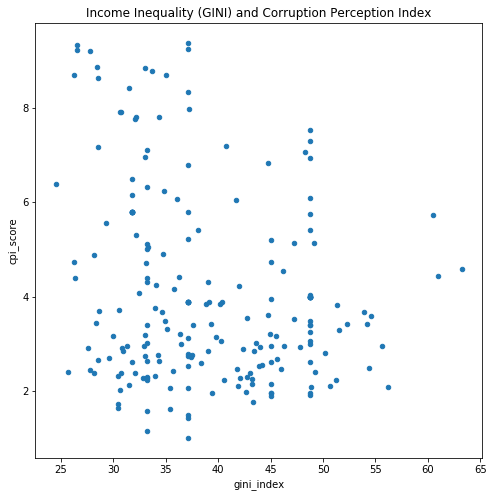

In [116]:
# Plot a scatter diagram, using adjusted cpi scores

df_q2.plot(x='gini_index', y='cpi_score', kind='scatter', figsize=(8,8))
plt.title('Income Inequality (GINI) and Corruption Perception Index');

In [117]:
df_q2.describe()

,cpi_score,gini_index
count,211.000000,211.000000
mean,4.088697,39.064161
std,2.002674,7.960935
min,1.000000,24.540000
25%,2.610000,33.035000
50%,3.480000,37.144133
75%,5.170000,45.027143
max,9.380000,63.200000


From above, we observe a very weak negative correlation between income inequality and corruption. **The data therefore is inconclusive with regards to a relationship between income inequality and corruption perception.** 

We will nevertheless seek to confirm this graphical observation by computing the correlation coefficient of these two data columns.

In [118]:
q2_correl = df_q2.gini_index.corr(df_q2.cpi_score)
print('Correlation coefficient between GINI and CPI: {}'.format(q2_correl))

Correlation coefficient between GINI and CPI: -0.22182758050583504


Negative value of -0.2 suggests a very weak negative correlation between income inequality and corruption perception, in line with visual observation.

### Q3. Is GDP per capita a good predictor of income inequality?

In [119]:
# Create dataframe with only these two columns

df_q3 = df_avg.drop(['cpi_score', 'infant_mortality_rate', 'literacy_rate'], axis=1)
df_q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 4 columns):
country           211 non-null object
region            211 non-null object
gini_index        211 non-null float64
gdp_per_capita    211 non-null float64
dtypes: float64(2), object(2)
memory usage: 6.7+ KB


In [120]:
df_q3.head()

,country,region,gini_index,gdp_per_capita
0,Afghanistan,Asia & Pacific,37.144133,6875.002351
1,Albania,Europe,30.000000,1844.903592
2,Algeria,Arab States,27.600000,2201.836568
3,Andorra,Europe,31.779065,21719.572490
4,Angola,Africa,42.700000,611.714745


In [121]:
df_q3.describe()

,gini_index,gdp_per_capita
count,211.000000,211.000000
mean,39.064161,8890.097876
std,7.960935,14024.659745
min,24.540000,103.104815
25%,33.035000,878.625684
50%,37.144133,3036.536292
75%,45.027143,9054.292336
max,63.200000,103885.246787


We have earlier examined GINI data and observed its right-ward skew, confirmed by the median being lower than the mean.

Looking at the gdp_per_capita data, we also observe the median to be significantly below the mean, suggesting there are outliers with large values and the distribution is skewed heavily to the right. 

Let us use a histogram to check this.

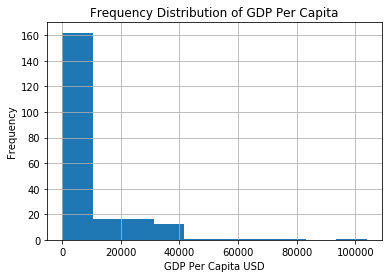

In [122]:
df_q3.gdp_per_capita.hist()
plt.title('Frequency Distribution of GDP Per Capita')
plt.ylabel('Frequency')
plt.xlabel('GDP Per Capita USD');


We can quickly look to see which countries have the highest GDP Per Capita, to better understand the chart.

In [123]:
# Highest GDP Per Capita
gdp_high = df_q3.gdp_per_capita.drop_duplicates().nlargest(5)
df_largest_gdp = df_q3.query('gdp_per_capita == @gdp_high')
df_largest_gdp.sort_values(by='gdp_per_capita', ascending=False)

,country,region,gini_index,gdp_per_capita
123,Monaco,Europe,31.779065,103885.246787
106,Liechtenstein,Europe,31.779065,82380.816170
20,Bermuda,North America,37.225000,65455.868678
108,Luxembourg,Europe,31.500000,53424.811696
38,Channel Islands,Europe,31.779065,45226.031700


Monaco is the source of the large outlier value, and this is supported by other publicly available data sources, such as CIA World Factbook:

https://www.cia.gov/library/publications/the-world-factbook/rankorder/2004rank.html

One other point of concern is the suggestion, from the mean and the 25th percentile, that a significant number of countries have very low GDP per capita values. It will be instructive to see the countries with the ten lowest values, and possibly also see the distribution spread by region 

In [124]:
# Lowest GDP per capita

gdp_low = df_q3.gdp_per_capita.drop_duplicates().nsmallest(10)
df_smallest_gdp = df_q3.query('gdp_per_capita in @gdp_low')
df_smallest_gdp.sort_values(by='gdp_per_capita')

,country,region,gini_index,gdp_per_capita
43,"Congo, Dem. Rep.",Africa,45.027143,103.104815
30,Burundi,Africa,45.027143,136.974269
60,Eritrea,Africa,45.027143,152.838384
76,Guinea-Bissau,Africa,50.700000,160.105497
112,Malawi,Africa,45.500000,172.459054
137,Niger,Africa,34.400000,175.920115
62,Ethiopia,Africa,33.200000,203.703223
36,Central African Republic,Africa,56.200000,228.850633
104,Liberia,Africa,36.500000,247.134621
111,Madagascar,Africa,42.400000,249.453045


All ten countries with lowest GDP per capita are in Africa, with the lowest value being Democratic Republic of Congo, showing **GDP per capita of USD103**. Contrasting this with Monaco at over **USD103,000** or even with war-torn Afghanistan at **USD6,875** is a shocking illustration of differences in standards of living across the world.

Let us see the average GDP Per Capita by region.

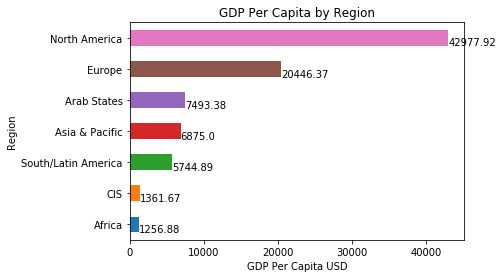

In [125]:
# GDP Per Capita by Region

df_q3_gdp_region = df_q3.groupby('region')['gdp_per_capita'].mean()
df_q3_gdp_region.sort_values(inplace=True)

ax = df_q3_gdp_region.plot(kind='barh')

ax.set_title('GDP Per Capita by Region')
ax.set_xlabel('GDP Per Capita USD')
ax.set_ylabel('Region')

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y(), str(round((i.get_width()), 2)));

Chart above illustrates the huge discrepancies in national wealth and productivity, given that GDP Per Capita is gross national income divided by population.

North America has by far the highest values, most likely driven by the huge USD19 trillion GDP of the USA.

One important point to add is that the GDP Per Capita figure is not adjusted for cost of living differences. Cost of living comparison website https://www.numbeo.com/cost-of-living/ for example, estimates that consumer prices including rent are 40% lower in South Africa compared to USA. This number will be higher for poorer African countries, suggesting that living conditions may not be as stark as the raw difference in GDP per capita suggests.

We will now draw a scatter plot to check for a relationship between GINI index and GDP per capita

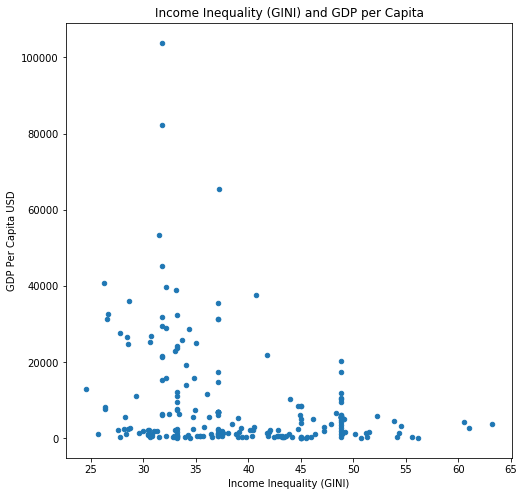

In [126]:
# Plot a scatter diagram, using adjusted cpi scores

df_q3.plot(x='gini_index', y='gdp_per_capita', kind='scatter', figsize=(8,8))
plt.title('Income Inequality (GINI) and GDP per Capita')
plt.ylabel('GDP Per Capita USD')
plt.xlabel('Income Inequality (GINI)');

From scatter plot above, there appears to be a weak negative correlation between income inequality and GDP per capita. This suggests that **the lower gdp per capita in a given country, the greater its income inequality is likely to be.** Put another way, **richer countries tend to have a fairer income distribution among their citizens.** 

Again, this association is weak and is not considered causative, merely correlative.

We will confirm this obervation by calculating the correlation coefficient.

In [127]:
q3_correl = df_q3.gini_index.corr(df_q3.gdp_per_capita)

In [128]:
print('Correlation coefficient between income inequality and GDP per Capita: {}'.format(q3_correl))

Correlation coefficient between income inequality and GDP per Capita: -0.3038398435955632


Negative coefficient of -0.3 confirms the visual observation.

### Q4. Does a correlation exist between literacy and health?

In this section, we seek to understand if any correlation exists between literacy and population health. This question is relevant because, for example, it will be useful for public policy if it can be shown that a literate population is more likely to be healthy.

As a reminder:

**Adult Literacy Rate:** Adult literacy rate is the percentage of people aged 15 years and above who can read and write.

**Infant Mortality Rate (IMR):** IMR has been defined as the number of deaths in children under 1 year of age per 1000 live births in the same year.

Let us examine the data.

In [129]:
# Create dataframe with only these relevant columns

df_q4 = df_avg.drop(['cpi_score', 'gdp_per_capita', 'gini_index'], axis=1)
df_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 4 columns):
country                  211 non-null object
region                   211 non-null object
infant_mortality_rate    211 non-null float64
literacy_rate            211 non-null float64
dtypes: float64(2), object(2)
memory usage: 6.7+ KB


In [130]:
df_q4.head()

,country,region,infant_mortality_rate,literacy_rate
0,Afghanistan,Asia & Pacific,76.86,39.000000
1,Albania,Europe,15.44,96.391969
2,Algeria,Arab States,24.46,81.398935
3,Andorra,Europe,2.60,98.149657
4,Angola,Africa,112.08,70.362420


In [131]:
df_q4.describe()

,infant_mortality_rate,literacy_rate
count,211.000000,211.000000
mean,27.883904,84.767862
std,25.568050,16.378714
min,1.930000,25.307745
25%,7.550000,81.383965
50%,17.780000,91.559827
75%,43.290000,98.149657
max,112.080000,99.998262


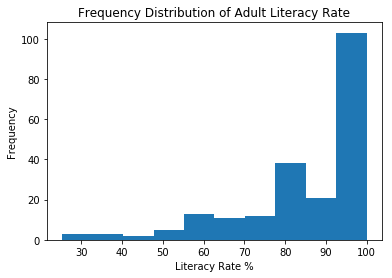

In [132]:
# Histogram of Literacy Rate

df_q4.literacy_rate.plot(kind='hist')
plt.title('Frequency Distribution of Adult Literacy Rate')
plt.xlabel('Literacy Rate %');

Literacy rate is the percentage of adults aged 15 and over who can read and write. 

While it's heartening to observe that most countries seem to have a high percentage of educated adults, we observe that in a small number of countries, there are disturbingly high numbers of adults wo are unable to read and write. 

Let us quickly try to dentify these countries. 

In [133]:
# Copy dataframe and remove unneeded column
literacy_nsmall = df_q4.copy()
literacy_nsmall = literacy_nsmall.drop('infant_mortality_rate', axis=1)

# Filter to 10 lowest literacy rate countries
literacy_nsmall_list = literacy_nsmall.literacy_rate.drop_duplicates().nsmallest(10)
literacy_nsmall = literacy_nsmall.query('literacy_rate in @literacy_nsmall_list')

# Sort dataframe
literacy_nsmall.sort_values('literacy_rate', inplace=True)
literacy_nsmall

,country,region,literacy_rate
75,Guinea,Africa,25.307745
29,Burkina Faso,Africa,28.729214
115,Mali,Africa,32.270483
37,Chad,Africa,35.391470
62,Ethiopia,Africa,38.995982
0,Afghanistan,Asia & Pacific,39.000000
104,Liberia,Africa,42.941084
164,Sierra Leone,Africa,43.283100
161,Senegal,Africa,49.695127
128,Mozambique,Africa,50.583811


The ten countries with lowest literacy rates are overwhelmingly in Africa, with Guinea, Burkina Faso and Mali as the lowest three at 25%, 29%, and 32%.

Let us perform the same quick check of countries with hightest literacy rates.

In [134]:
# Copy dataframe and remove unneeded column
literacy_nlarge = df_q4.copy()
literacy_nlarge = literacy_nlarge.drop('infant_mortality_rate', axis=1)

# Filter to 10 highest literacy rate countries
literacy_nlarge_list = literacy_nlarge.literacy_rate.drop_duplicates().nlargest(10)
literacy_nlarge = literacy_nlarge.query('literacy_rate in @literacy_nlarge_list')

# Sort dataframe
literacy_nlarge.sort_values(by='literacy_rate', ascending=False, inplace=True)
literacy_nlarge

,country,region,literacy_rate
140,North Korea,Asia & Pacific,99.998262
49,Cuba,South/Latin America,99.834250
61,Estonia,Europe,99.796890
101,Latvia,Europe,99.784240
68,Georgia,CIS,99.732470
94,Kazakhstan,CIS,99.732411
150,Poland,Europe,99.730190
198,Ukraine,CIS,99.718740
185,Tajikistan,CIS,99.707060
107,Lithuania,Europe,99.703550


Some surprise appearances are North Korea, Cuba and Kazakhstan.

We should take a similar look at our infant mortality rate data: distribution, ten highest and ten lowest. After taking an overview of the data in this way, we will finally attempt to answer the research question.

Recall that infant mortality rate is the number of deaths in children under 1 year of age per 1000 live births, and this measure is seen as a good indicator of population health.

Let us start by looking at the distribution of infant mortality rates.

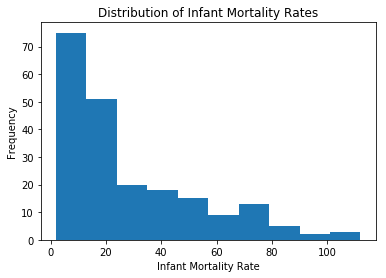

In [135]:
df_q4.infant_mortality_rate.plot(kind='hist')
plt.title('Distribution of Infant Mortality Rates')
plt.ylabel('Frequency')
plt.xlabel('Infant Mortality Rate');

Data is skewed to right, with most countries having low IMR. Unfortunately, however, a few countries have high IMR values. We will take a look at the ten highest and ten lowest IMR countries.

In [136]:
# Copy dataframe and remove unneeded column
imr_nlarge = df_q4.copy()
imr_nlarge.drop('literacy_rate', axis=1, inplace=True)

# Filter to 10 highest imr
imr_nlarge_list = imr_nlarge.infant_mortality_rate.drop_duplicates().nlargest(10)
imr_nlarge = imr_nlarge.query('infant_mortality_rate in @imr_nlarge_list')

# Sort dataframe
imr_nlarge.sort_values(by='infant_mortality_rate', ascending=False, inplace=True)
imr_nlarge

,country,region,infant_mortality_rate
4,Angola,Africa,112.08
164,Sierra Leone,Africa,111.54
36,Central African Republic,Africa,103.48
169,Somalia,Arab States,99.80
37,Chad,Africa,95.08
43,"Congo, Dem. Rep.",Africa,87.00
115,Mali,Africa,85.30
138,Nigeria,Africa,84.44
59,Equatorial Guinea,Africa,81.34
47,Cote d'Ivoire,Africa,79.26


All ten countries with highest IMR are in Africa, including Somalia which our region classification shows as an Arab State. Let us also look at the ten countries with lowest IMR. 

In [137]:
# Copy dataframe and remove unneeded column
imr_small = df_q4.copy()
imr_small.drop('literacy_rate', axis=1, inplace=True)

# Filter to 10 lowest imr
imr_small_list = imr_small.infant_mortality_rate.drop_duplicates().nsmallest(10)
imr_small = imr_small.query('infant_mortality_rate in @imr_small_list')

# Sort dataframe
imr_small.sort_values(by='infant_mortality_rate', inplace=True)
imr_small

,country,region,infant_mortality_rate
106,Liechtenstein,Europe,1.93
82,Iceland,Europe,1.98
108,Luxembourg,Europe,2.06
165,Singapore,Asia & Pacific,2.22
92,Japan,Asia & Pacific,2.44
181,Sweden,Europe,2.54
3,Andorra,Europe,2.60
64,Finland,Europe,2.62
141,Norway,Europe,2.74
167,Slovenia,Europe,2.86


The ten lowest IMR countries are shown above. The metric suggests high levels of populations health for these countries.

We will now investigate if any relationship exists between adult literacy and health.

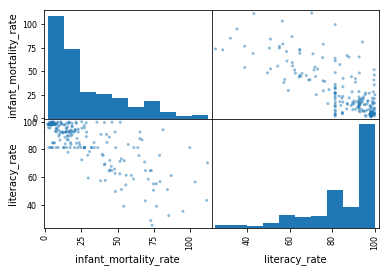

In [138]:
# Single shot view of distributions and correlations

pd.plotting.scatter_matrix(df_q4);

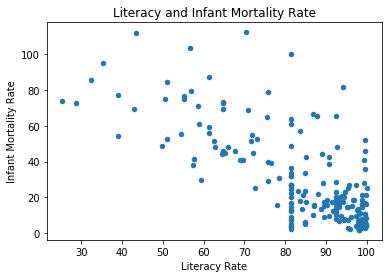

In [139]:
# Scatter plot between literacy and IMR

q4_1 = df_q4.plot(kind='scatter', x='literacy_rate', y='infant_mortality_rate')
q4_1.set_title('Literacy and Infant Mortality Rate')
q4_1.set_xlabel('Literacy Rate')
q4_1.set_ylabel('Infant Mortality Rate');

There appears to be a strong negative correlation between literacy and infant mortality. **The higher the rate of adult literacy, the fewer infant deaths are recorded, indicating a healthier populations are associated with literate populations.**

Let us confirm this by calculating the correlation coefficient.

In [140]:
# Calculate correlation coefficient between literacy and infant mortality

df_q4.literacy_rate.corr(df_q4.infant_mortality_rate)

-0.7603129044114025

High negative coefficient of -0.76 confirms the visual observation.

It must be repeated that this merely indicates a correlation and does not confirm causation. 

<a id='conclusions'></a>
## Conclusions

We will now summarize the findings from our data exploration, performed under the guidance of four questions.

It must be stressed that the main tool of analysis here was descriptive statistics. And even that was limited to mainly correlation. This analysis therefore makes no claims about a causal relation between any of the measures used.

Nevetheless, this analysis has explored multiple socio-economic indicators across countries of the world. For each indicator, we have identified global and regional frequency distributions, as well as top and bottom countries. So even though the research questions focused on correlation-type questions, our journey through the exploration process exposed some interesting learnings. 

For example, our exploration showed that while we find the worst cases of income inequality in Africa, on average by region it is South America that shows the worst levels.

We also found, surprisingly for me, that North Korea, Cuba and Kazakhstan are in the top six most literate countries in the world.

These insights and correlations exposed in this project can serve as a useful entry point into deeper analysis of the research questions posed here.

### Question 1 Findings: Which five countries have the highest and lowest income inequality?

Our observation in relation to this question is that the five countries with lowest income inequality are in Europe. They are Slovenia, Ukraine, Norway, Czech Republic, Slovakia.

On the other hand, the five countries with highest income inequality are in Africa. They are South Africa, Namibia, Botswana, Central African Republic, and Zambia. 

However, a few Afrian countries seem to have admirably high levels of fair income distribution, so that on average, South America, not Africa, appears to have the worst income inequality.

### Question 2 Findings: Is there a relationship between income inequality and corruption?

Our observation is that a very weak negative correlation exists between income inequality and corruption. **The data therefore is inconclusive with regards to a relationship between income inequality and corruption perception.** 


### Question 3 Findings: Is GDP per capita a good predictor of income inequality?

From analysis of our data, it appears there is a negative correlation between income inequality and GDP per capita. This suggests that **the lower the gdp per capita in a country, the greater its income inequality is likely to be.** Put another way, **richer countries tend to have a fairer income distribution among their citizens.** 

Again, this association is not considered to be causative, merely correlative.

### Question 4 Findings: Does a correlation exist between literacy and health?

There appears to be a strong negative correlation between literacy and infant mortality. **This implies that the higher the rate of adult literacy, the fewer infant deaths are recorded, or put another way, healthy populations are likely to be literate.**

## Resources

### Coding resources

- Python For Data Analysis 2nd Edition, Wes Mckinney, O'REILLY, ISBN: 9781491957660
- https://stackoverflow.com/
- http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
- https://matplotlib.org/api/
- http://pandas.pydata.org/pandas-docs/stable/
- https://morphocode.com/pandas-cheat-sheet/



### Definitions and Additional Information on metrics
- https://www.cia.gov/library/publications/the-world-factbook/rankorder/2004rank.html
- https://www.transparency.org/cpi2011/results
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1732453/
- https://data.worldbank.org/indicator/SI.POV.GINI 
- https://meta.wikimedia.org/wiki/List_of_countries_by_regional_classification
- https://www.numbeo.com/cost-of-living/

